In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from extract_ingest.ingest import Ingestor
from data_preprocessing.type_convert import TypeConvert

In [2]:
from analyze.basic_data_inspection import DataInspector, DataSummaryInspectionStrategy, DataTypeInspectionStrategy
from analyze.missing_value import SimpleMisssingValueAnalysis
from analyze.univariate_analysis import UnivariateAnalyzer
from analyze.bivariate_analysis import BivariateAnalyzer

In [3]:
ingest = Ingestor()
df = ingest.ingest("C:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\extracted_data\household_power_consumption.txt")

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ratho\AppData\Local\Temp\ipykernel_28696\3237331455.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = ingest.ingest("C:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\extracted_data\household_power_consumption.txt")
c:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\extract_ingest\ingest.py:25: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filePath, delimiter=';')


In [4]:
numeric_cols = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
]

convert = TypeConvert()
df = convert.convert(df, numeric_cols, "numeric")
df = convert.convert(df, ['Date'], "datetime")

c:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\data_preprocessing\type_convert.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors="coerce")


In [5]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [6]:
inspect = DataInspector(DataTypeInspectionStrategy())
inspect.execute_strategy(df)


Data type and not null count
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB
None


In [7]:
inspect.setStrategy(DataSummaryInspectionStrategy())
inspect.execute_strategy(df)


Data Summary (Numeric Feature)
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06   
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000

In [8]:
SimpleMisssingValueAnalysis().MissingValueIdentify(df)


Missing Value count by Column
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64



 Visualizing Missing Value


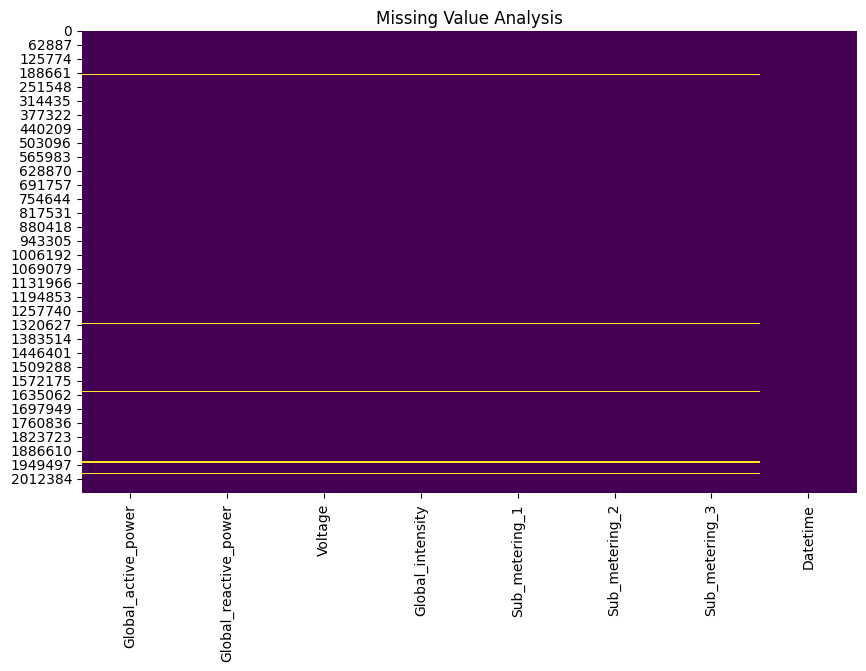

In [9]:
SimpleMisssingValueAnalysis().MissingValueAnalysis(df)

'Global_active_power' is a numerical feature.


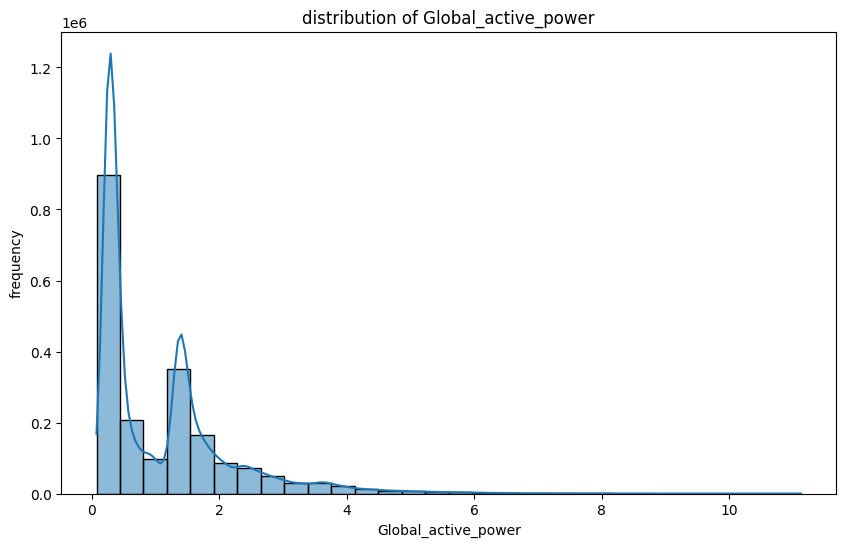

'Global_reactive_power' is a numerical feature.


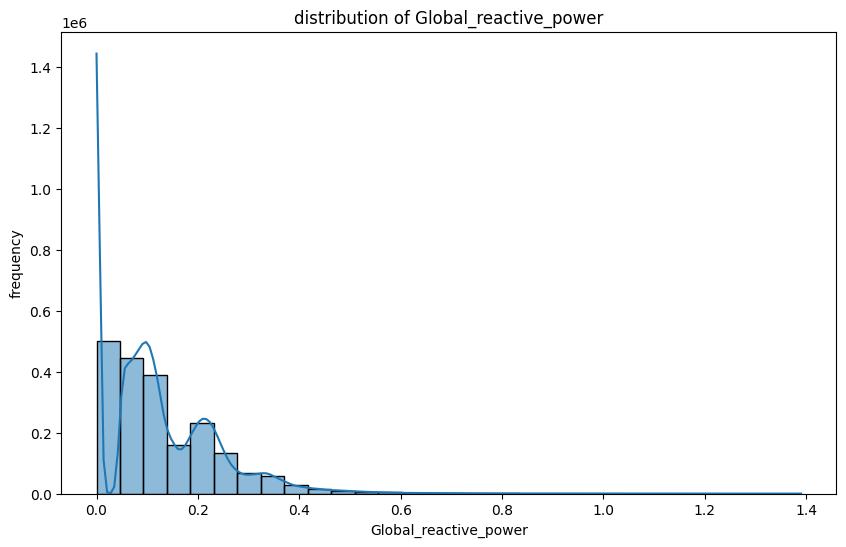

'Voltage' is a numerical feature.


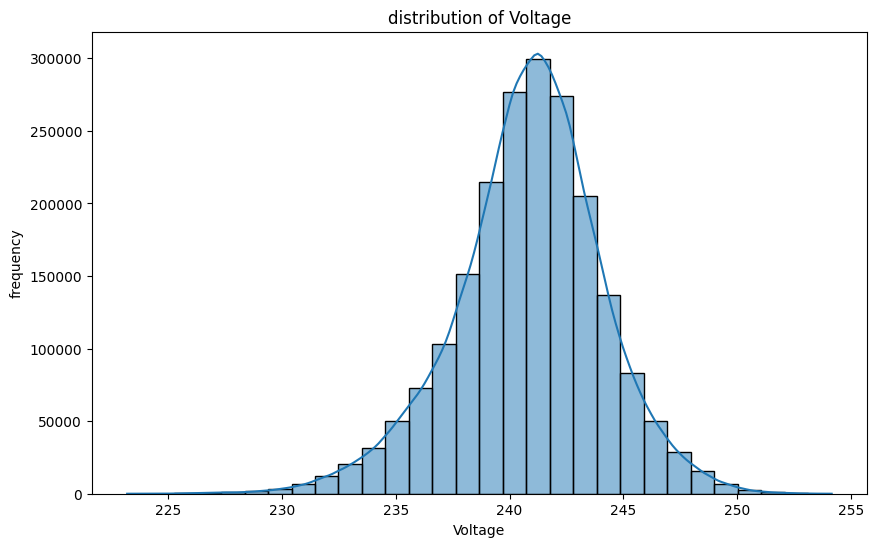

'Global_intensity' is a numerical feature.


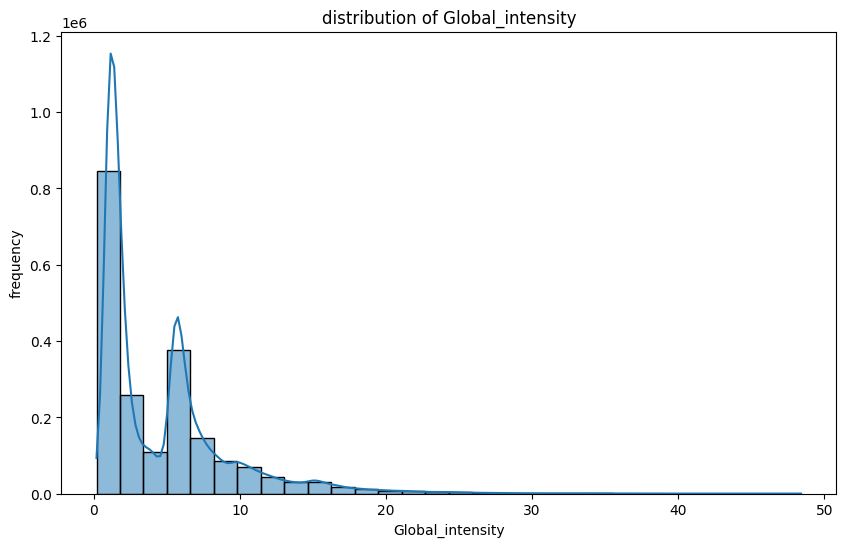

'Sub_metering_1' is a numerical feature.


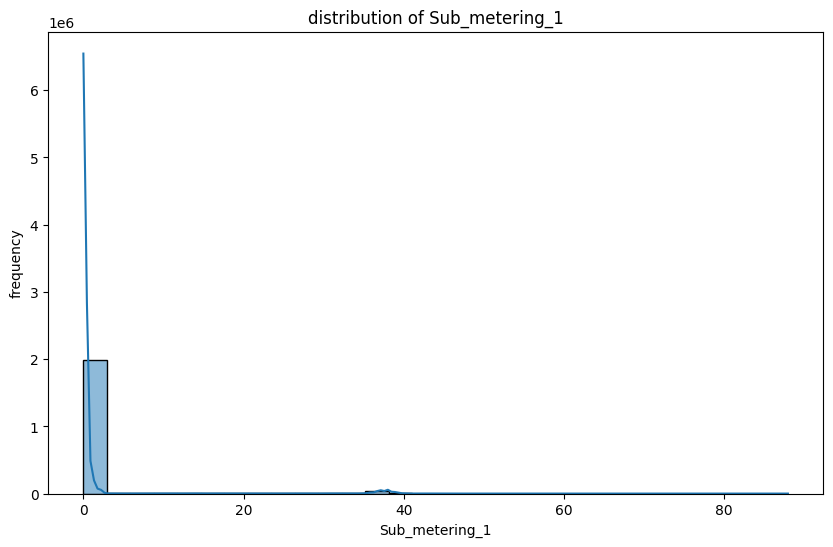

'Sub_metering_2' is a numerical feature.


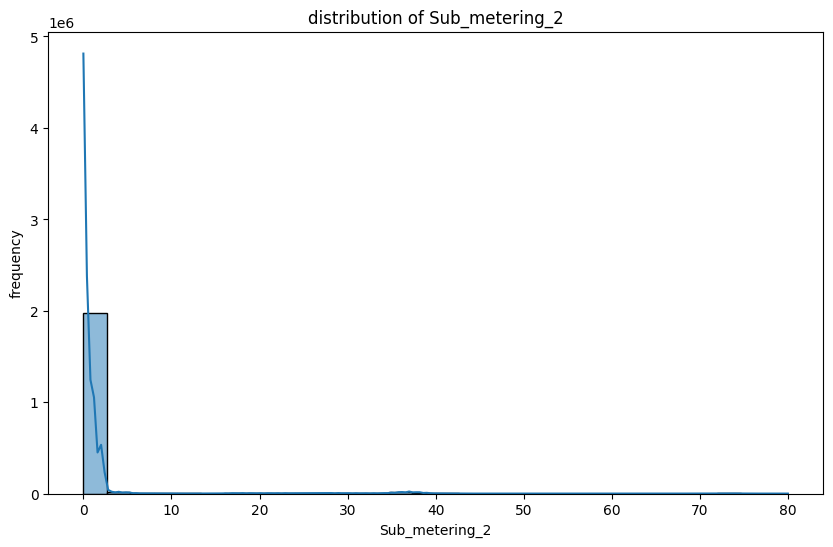

'Sub_metering_3' is a numerical feature.


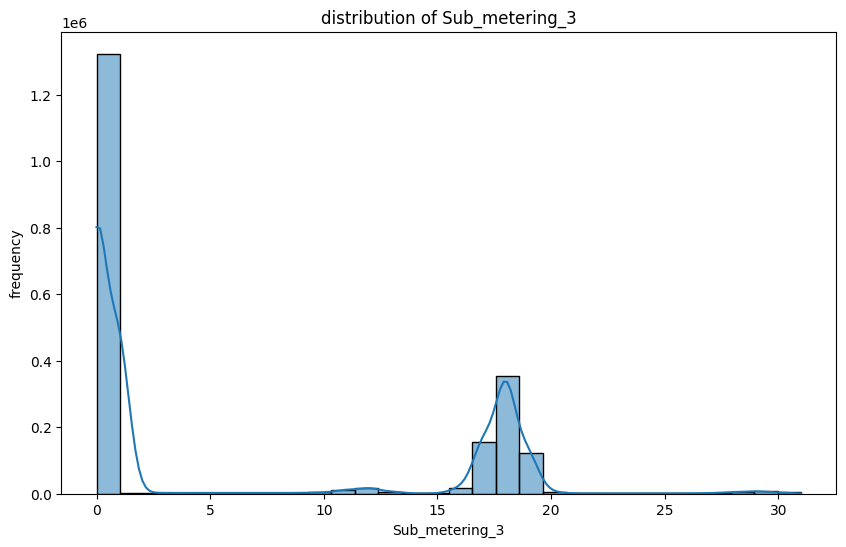

In [10]:
features = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

for feature in features:
    UnivariateAnalyzer().execute_strategy(df, feature)